Исходный ряд:
 [107.5 154.9  98.1 111.7 130.  114.8 163.6  84.3 147.9 138.2 141.2 125.
 129.2  87.7  89.  164.  162.3 154.7 146.  131.6 124.4 146.7 144.5 125.7
 139.7 142.  145.3 140.8 155.4 132.5  86.1 120.7 121.  124.3 125.2 162.3
 140.7  98.3  98.  159.   94.6 128.  162.3 117.5 128.4 130.3 163.4 135.7
 119.5 103.2 146.   95.3  91.9 126.1 150.9 129.4 141.7 162.1  96.  169.9
 113.9 153.9 107.5 137.3 156.7 126.9 124.2 122.8 116.1 143.  143.2 124.5
  84.6 121.4 104.1 130.3 128.6 140.4 131.5 131.  108.6 124.  102.9 104.3
 146.8 140.5 112.1 110.1 135.8 119.  143.6  84.9  98.2 150.1 126.4 140.9
 121.7 139.9 125.6 112.9 119.7 143.8 131.1 122.9 137.4 153.9 125.  123.4
 115.9 145.3 143.9 154.5 166.7 122.4]
Ранжированный ряд:
 [ 84.3  84.6  84.9  86.1  87.7  89.   91.9  94.6  95.3  96.   98.   98.1
  98.2  98.3 102.9 103.2 104.1 104.3 107.5 107.5 108.6 110.1 111.7 112.1
 112.9 113.9 114.8 115.9 116.1 117.5 119.  119.5 119.7 120.7 121.  121.4
 121.7 122.4 122.8 122.9 123.4 124.  124.2 124.3 124

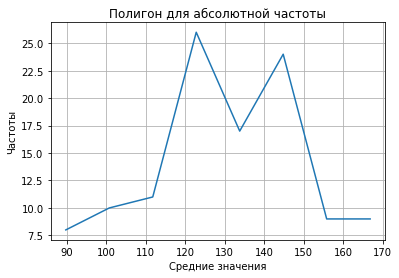

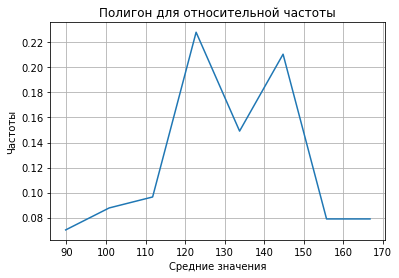

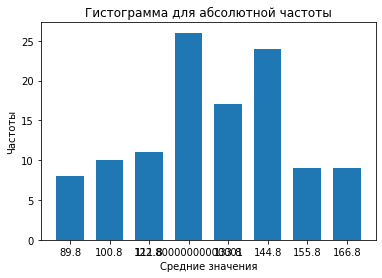

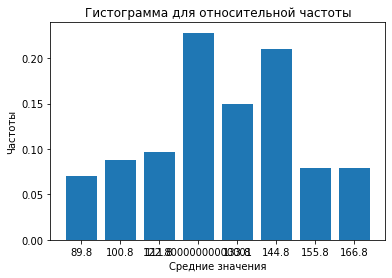

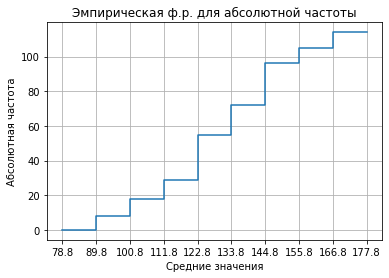

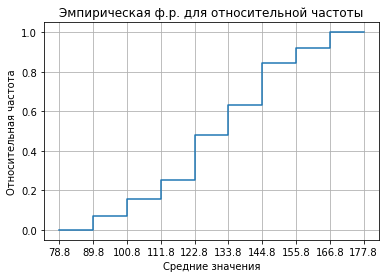

   Средние значения  Частоты  Условные варианты   nu1    nu2    nu3     nu4  \
0              89.8        8               -4.0 -32.0  128.0 -512.0  2048.0   
1             100.8       10               -3.0 -30.0   90.0 -270.0   810.0   
2             111.8       11               -2.0 -22.0   44.0  -88.0   176.0   
3             122.8       26               -1.0 -26.0   26.0  -26.0    26.0   
4             133.8       17                0.0   0.0    0.0    0.0     0.0   
5             144.8       24                1.0  24.0   24.0   24.0    24.0   
6             155.8        9                2.0  18.0   36.0   72.0   144.0   
7             166.8        9                3.0  27.0   81.0  243.0   729.0   

   Проверка  
0     648.0  
1     160.0  
2      11.0  
3       0.0  
4      17.0  
5     384.0  
6     729.0  
7    2304.0  
Условный эмпирический момент 1 порядка: -0.3596491228070178
Условный эмпирический момент 2 порядка: 3.763157894736844
Условный эмпирический момент 3 порядка: -4.8

In [1]:
from lr2_y import x_middle, disp, sko, S2, S, N, spaces, spaces_abs_freq
import math
import pandas as pd
import numpy as np
from math import sqrt

In [2]:
from scipy import special

# функция Лапласа
def laplas(x):
    return special.erf(x/2**0.5)/2 

In [3]:
S = sqrt(S2)
print(pd.DataFrame({
    "Интервал": map(lambda x: "[{},{})".format(x[0], x[1]), spaces),
    "Середина": map(lambda x: ((x[0] + x[1]) / 2).round(2), spaces),
    "Частоты": spaces_abs_freq
}))
print("N: {}".format(N))
print("Матожидание: {}".format(x_middle))
print("Дисперсия: {}".format(disp))
print("СКО: {}".format(sko))
print("Исправленная дисперсия: {}".format(S2))
print("Исправленное СКО: {}".format(S))

        Интервал  Середина  Частоты
0    [84.3,95.3)      89.8        8
1   [95.3,106.3)     100.8       10
2  [106.3,117.3)     111.8       11
3  [117.3,128.3)     122.8       26
4  [128.3,139.3)     133.8       17
5  [139.3,150.3)     144.8       24
6  [150.3,161.3)     155.8        9
7  [161.3,172.3)     166.8        9
N: 114
Матожидание: 129.8438596491228
Дисперсия: 439.6910587873194
СКО: 20.96881157307966
Исправленная дисперсия: 443.5821301040213
Исправленное СКО: 21.061389557767107


In [4]:
_gamma = 0.99
_t = 2.617
_t = S * _t / np.sqrt(N)
_i1 = x_middle - _t
_i2 = x_middle + _t
print("Для надежности {} и объема выборки n={} было выбрано значение t={} по приложению 6".format(_gamma, N, _t))
print("Доверительный интервал для матожидания: ({}, {})".format(_i1, _i2))

Для надежности 0.99 и объема выборки n=114 было выбрано значение t=5.1622415019942745 по приложению 6
Доверительный интервал для матожидания: (124.68161814712853, 135.0061011511171)


In [5]:
_q = 0.198
_i1 = S * (1 - _q)
_i2 = S * (1 + _q)
print("Для надежности {} и объема выборки n={} было выбрано значение q={} по приложению 7".format(_gamma, N, _q))
print("Доверительный интервал для СКО: ({}, {})".format(_i1, _i2))

Для надежности 0.99 и объема выборки n=114 было выбрано значение q=0.198 по приложению 7
Доверительный интервал для СКО: (16.89123442532922, 25.231544690204995)


In [6]:
_x = list(map(lambda x: x[0], spaces))
_x.append(spaces[-1][1])
df = pd.DataFrame()
df['x_i'] = _x[:-1]
df['x_(i+1)'] = _x[1:]
df['n_i'] = spaces_abs_freq
df['z_i'] = df.iloc[:, 0].apply(lambda x: (x - x_middle) / S)
df['z_(i+1)'] = df.iloc[:, 1].apply(lambda x: (x - x_middle) / S)
df['F(z_i)'] = df.iloc[:, 3].apply(lambda x: laplas(x))
df['F(z_(i+1))'] = df.iloc[:, 4].apply(lambda x: laplas(x))
df['p_i'] = df.iloc[:, 5:7].apply(lambda x: x[1] - x[0], axis=1)
df['n_i1'] = df.iloc[:, 7].apply(lambda x: N * x)

df

,x_i,x_(i+1),n_i,z_i,z_(i+1),F(z_i),F(z_(i+1)),p_i,n_i1
0,84.3,95.3,8,-2.162434,-1.640151,-0.484708,-0.449513,0.035195,4.012174
1,95.3,106.3,10,-1.640151,-1.117868,-0.449513,-0.368188,0.081325,9.271020
2,106.3,117.3,11,-1.117868,-0.595586,-0.368188,-0.224274,0.143914,16.406246
3,117.3,128.3,26,-0.595586,-0.073303,-0.224274,-0.029217,0.195057,22.236442
4,128.3,139.3,17,-0.073303,0.448980,-0.029217,0.173277,0.202494,23.084356
5,139.3,150.3,24,0.448980,0.971263,0.173277,0.334291,0.161014,18.355633
6,150.3,161.3,9,0.971263,1.493545,0.334291,0.432353,0.098062,11.179012
7,161.3,172.3,9,1.493545,2.015828,0.432353,0.478091,0.045738,5.214163


In [7]:
df1 = pd.DataFrame()

df1['n_i'] = spaces_abs_freq
df1['n_i1'] = df['n_i1']
df1['(n_i - n_i1)^2 / n_i1'] = df1.iloc[:, :].apply(lambda x: (x[0] - x[1])**2 / x[1], axis=1)

X2_seen = df1.iloc[:,2].sum()

print("X2_наб = {}".format(X2_seen))
print("Число стееней свободы k = {} - 3 = {}".format(len(spaces), len(spaces)-3))
print("Для числа степеней свободы 5 X_крит = {}".format(11.07))
df1


X2_наб = 12.952233308857679
Число стееней свободы k = 8 - 3 = 5
Для числа степеней свободы 5 X_крит = 11.07


,n_i,n_i1,(n_i - n_i1)^2 / n_i1
0,8,4.012174,3.963627
1,10,9.271020,0.057320
2,11,16.406246,1.781486
3,26,22.236442,0.636989
4,17,23.084356,1.603657
5,24,18.355633,1.735646
6,9,11.179012,0.424733
7,9,5.214163,2.748776
